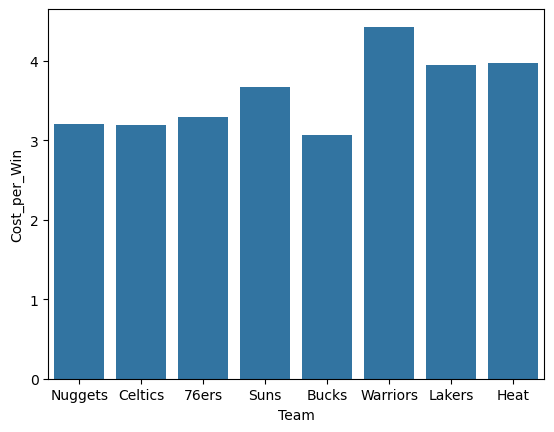

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Team': ['Nuggets', 'Celtics', '76ers', 'Suns', 'Bucks', 'Warriors', 'Lakers', 'Heat'],
    'Conference': ['West', 'East', 'East', 'West', 'East', 'West', 'West', 'East'],
    'Wins': [53, 57, 54, 45, 58, 44, 43, 44],  # 승리
    'FGA': [88.7, 88.5, 86.6, 88.4, 87.8, 92.1, 88.5, 84.7],  # 경기당 야투 시도
    'FGM': [44.2, 41.5, 41.8, 41.5, 41.4, 43.6, 41.7, 39.8],  # 경기당 야투 성공
    'Turnovers': [14.5, 13.4, 13.7, 13.9, 14.4, 16.3, 14.1, 13.5],  # 경기당 턴오버
    'Playoff': [True, True, True, True, True, True, True, False],  # 플레이오프 진출 여부
    'Team_Salary': [170, 182, 178, 165, np.nan, 195, np.nan, 175]  # 팀 연봉 총액 (백만 달러)
}
df_nba = pd.DataFrame(data)

# 데이터 정제
median_salary = df_nba.groupby('Conference')['Team_Salary'].transform('median')
df_nba['Team_Salary'] = df_nba['Team_Salary'].fillna(median_salary)

# 새로운 정보 생성
df_nba['FG_Efficiency'] = df_nba['FGM'] / df_nba['FGA']

df_nba['Cost_per_Win'] = df_nba['Team_Salary'] / df_nba['Wins']

# 심층 분석
filtered = df_nba[(df_nba['Playoff'] == True) & (df_nba['Conference'] == 'East')]

po_teams_east = filtered.sort_values('Cost_per_Win', ascending=True)

# 통계 및 고급 시각화
correction = df_nba['Team_Salary'].corr(df_nba['Wins'])
# 0에 매우 가까운 아주 약한 양의 상관관계 / 팀의 연봉 총액과 승수 사이에는 뚜렷한 관계가 거의 없다.

sns.scatterplot(x='Turnovers', y='FG_Efficiency', hue='Conference', data=df_nba)
plt.show()
# west가 여러방면으로 분포되어 있고, east가 밀집되어 있음.

sns.barplot(x='Team', y='Cost_per_Win', data=df_nba)
plt.show()
# 가성비가 가장 나쁜 팀은 Worriors / 좋은 팀은 Bucks